## Практическая 8_1
## Шамсутдинов Рустам БВТ2201

### Задание 1

In [199]:
import numpy as np
import random

n = 100
lambd = 0.01

def invFunc(p, lambd):   
    result= (- 1 / lambd) * np.log(p)
    return result


def Num(n, lambd):
    exp_Num = []

    for _ in range(n):
        p= random.uniform(0,1)
        N = invFunc(p, lambd)
        exp_Num.append(N)

    return exp_Num



### Задание 2

Выборка сгенерировання:
33.535025892199165 53.81580876913499 20.33756491101913 247.28329914427195 21.752481504338984 62.65181436332783 102.6657825240246 110.86383800134283 42.60809203498671 17.406687938030846 204.87822233563259 94.9537743255628 27.253705672577517 45.57015855911379 42.12840741372001 60.13804248604533 8.76200049858658 136.62129773791983 99.35122644465382 30.459172514673288 58.63798867220963 36.38067857986914 391.0282424838195 84.15738993351789 12.14842440560069 143.01295270187197 21.86619275418585 191.341867495806 13.304924285679173 33.76074754436796 246.81989963692047 252.3174278236646 94.97906696480922 64.61885253705894 16.249802257013865 150.46354212535337 11.690220118282319 70.40237847419536 107.85904743133754 53.973483196072 336.0170309141173 63.262389958870614 126.45988570161715 184.62861679278154 101.33612912629819 22.66313110581804 13.541418134840297 86.12485470464654 50.48969427367959 150.5127618113996 217.8275893077447 51.82931580346401 218.580986370763 151.843

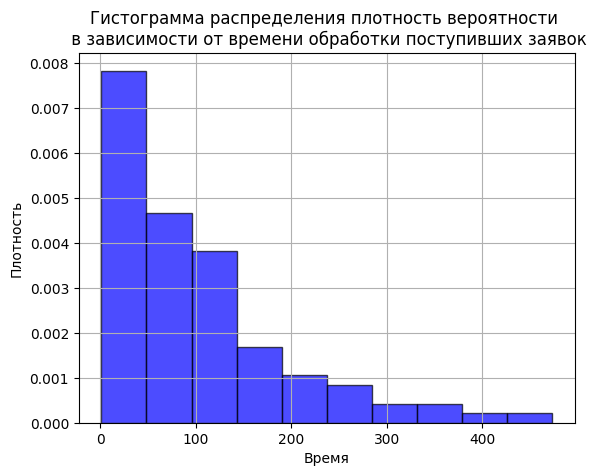

In [200]:
import matplotlib.pyplot as plt

def plot_histogram(data, bins=10, title="Гистограмма распределения плотность вероятности \n в зависимости от времени обработки поступивших заявок"):

    data_min = min(data)  
    data_max = max(data)  


    plt.hist(data, bins=bins, range=(data_min, data_max), density=True, color="blue", edgecolor="black", alpha=0.7)
    plt.title(title)
    plt.xlabel("Время")
    plt.ylabel("Плотность")
    plt.grid()
    plt.show()


data = Num(n, lambd)
print("Выборка сгенерировання:")
print(*data)
plot_histogram(data)


### Задание 3

In [201]:
def extract_hist_coord(data, bins=10):
    counts, edges = np.histogram(data, bins=bins, density=True)
    centers = (edges[:-1] + edges[1:])/2

    return centers, counts

centers, counts = extract_hist_coord(data)
print("Опорные точки")
print(f"Центры: {centers}")
print(f"Плотность: {counts}")

Опорные точки
Центры: [ 24.62582704  71.84967763 119.07352821 166.2973788  213.52122939
 260.74507997 307.96893056 355.19278114 402.41663173 449.64048232]
Плотность: [0.00783502 0.00465866 0.00381163 0.00169406 0.00105879 0.00084703
 0.00042351 0.00042351 0.00021176 0.00021176]


### Задание 4

In [202]:
def calculate_b0_b1(x, y):
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x ** 2)
    sum_xy = np.sum(x * y)
    n = len(x)

    b0 = (sum_y * sum_x2 - (sum_xy * sum_x)) / (n*sum_x2 - (sum_x * sum_x)) 
    b1 = (sum_y * sum_x - (n*sum_xy))/ (sum_x * sum_x - (n * sum_x2)) 

    return b0, b1

ln_counts = np.log(counts + 1e-9) 

b0_ex, b1_ex = calculate_b0_b1(centers, ln_counts)
print(f"b0_ex = {b0_ex:.5f}, b1_ex = {b1_ex:.5f}")

b1_true = - b1_ex

relative_err = abs(b1_true - lambd) / lambd


print(f"Погрешность восстановления коэффициента интенсивности составила {relative_err * 100:.0f} %")


b0_ex = -4.73947, b1_ex = -0.00892
Погрешность восстановления коэффициента интенсивности составила 11 %


### Задание 5

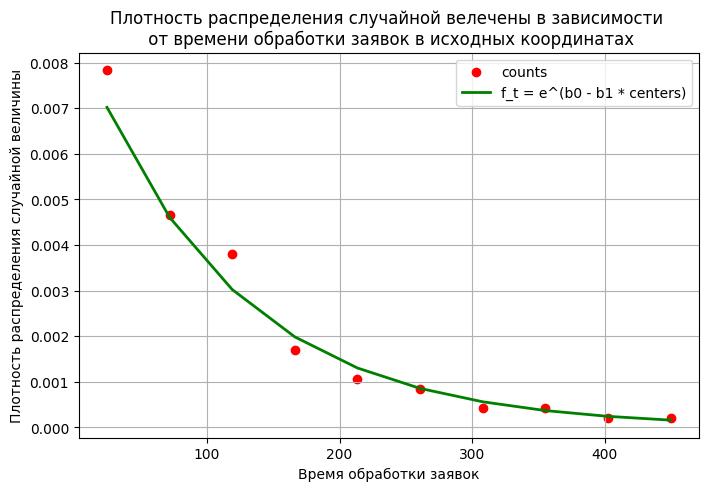

In [203]:
b1_true = -b1_ex

ln_f_t = b0_ex - b1_true * centers
f_t = np.exp(ln_f_t)

def plot_flow_density_vs_time(centers, counts, f_t):

    plt.figure(figsize=(8, 5))
    plt.scatter(centers, counts, label="counts", color="red")
 
    plt.plot(centers, f_t, color="green", linewidth=2, label="f_t = e^(b0 - b1 * centers)")

    plt.title("Плотность распределения случайной велечены в зависимости \n от времени обработки заявок в исходных координатах")
    plt.xlabel("Время обработки заявок")
    plt.ylabel("Плотность распределения случайной величины")
    plt.grid()
    plt.legend()
    plt.show()

plot_flow_density_vs_time(centers, counts, f_t)

### Задания 6 и 7


 Выборка n = 100


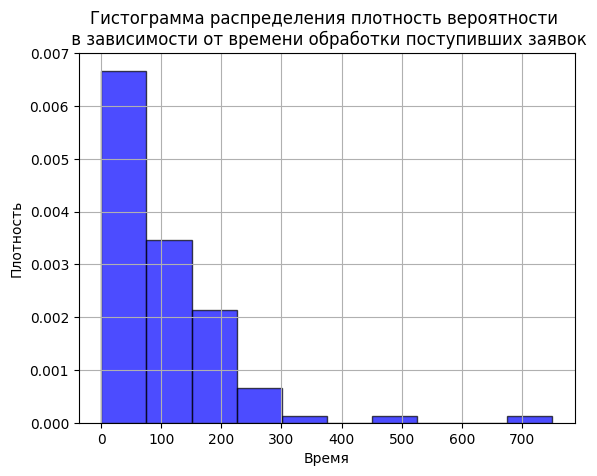

Опорные точки
Центры: [ 37.98369602 112.97956775 187.97543949 262.97131123 337.96718297
 412.96305471 487.95892644 562.95479818 637.95066992 712.94654166]
Плотность: [0.00666703 0.00346686 0.00213345 0.0006667  0.00013334 0.
 0.00013334 0.         0.         0.00013334]
b0_ex = -4.32538, b1_ex = -0.01860
Погрешность восстановления коэффициента интенсивности составила 8596 %


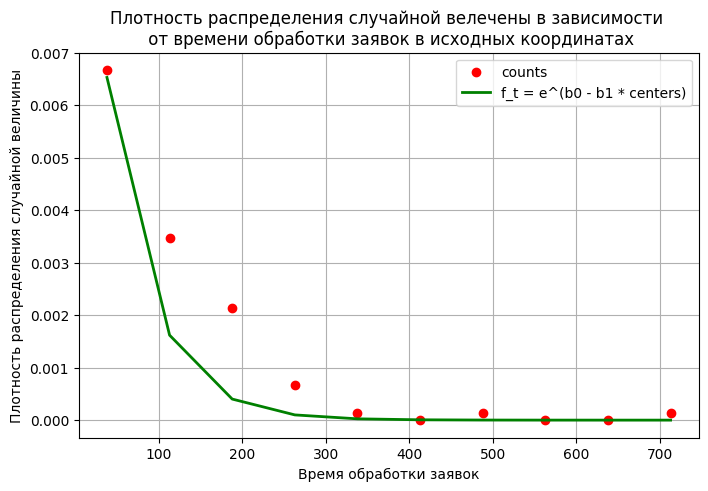


 Выборка n = 300


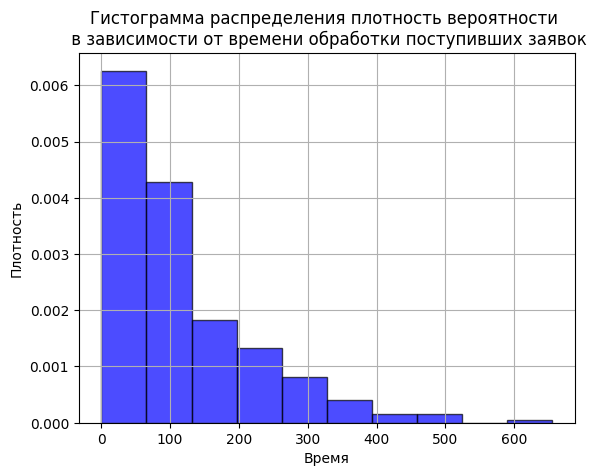

Опорные точки
Центры: [ 32.8362412   98.34220771 163.84817421 229.35414072 294.86010722
 360.36607373 425.87204024 491.37800674 556.88397325 622.38993975]
Плотность: [6.25897184e-03 4.27441980e-03 1.83189420e-03 1.32303470e-03
 8.14175199e-04 4.07087600e-04 1.52657850e-04 1.52657850e-04
 0.00000000e+00 5.08859500e-05]
b0_ex = -3.51003, b1_ex = -0.01571
Погрешность восстановления коэффициента интенсивности составила 5708 %


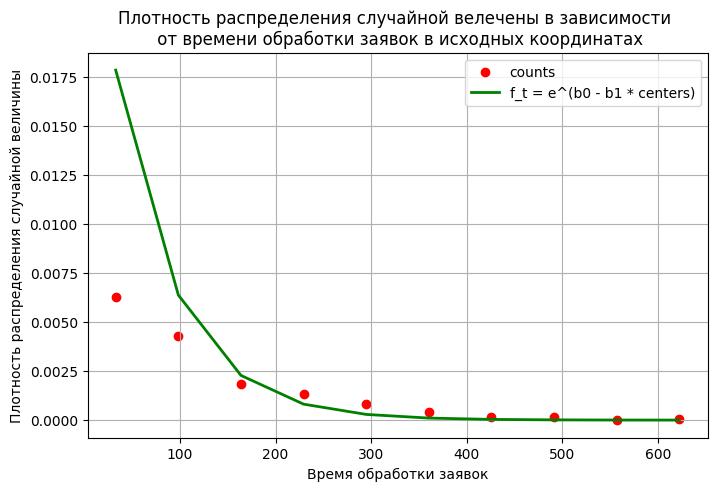


 Выборка n = 500


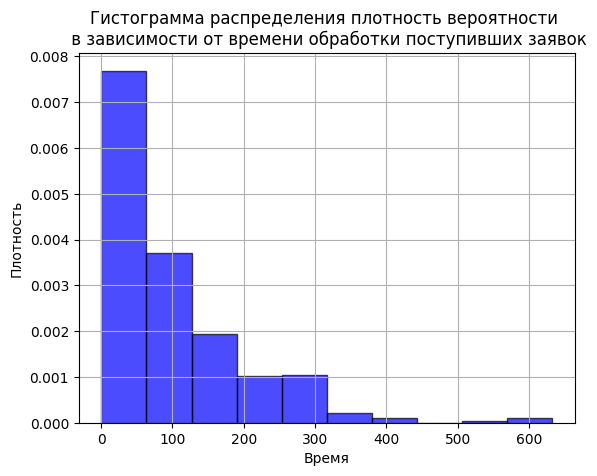

Опорные точки
Центры: [ 31.91390287  95.13016094 158.346419   221.56267707 284.77893513
 347.99519319 411.21145126 474.42770932 537.64396739 600.86022545]
Плотность: [7.68789572e-03 3.70157942e-03 1.92988329e-03 1.01239779e-03
 1.04403522e-03 2.21462017e-04 9.49122929e-05 0.00000000e+00
 3.16374310e-05 9.49122929e-05]
b0_ex = -4.18202, b1_ex = -0.01475
Погрешность восстановления коэффициента интенсивности составила 4755 %


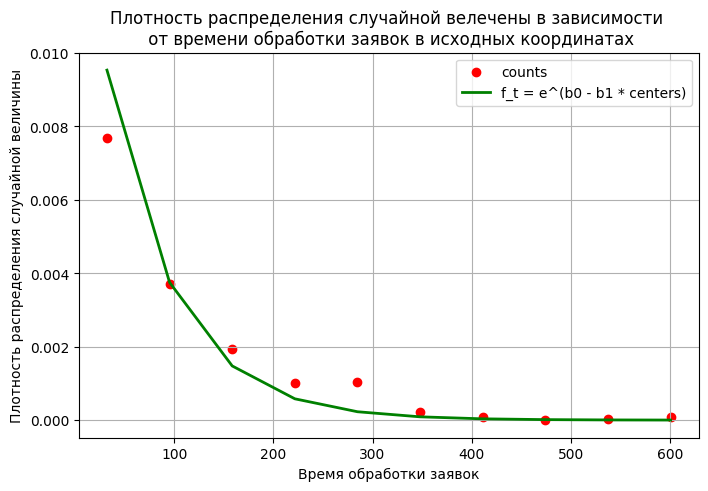


 Выборка n = 1000


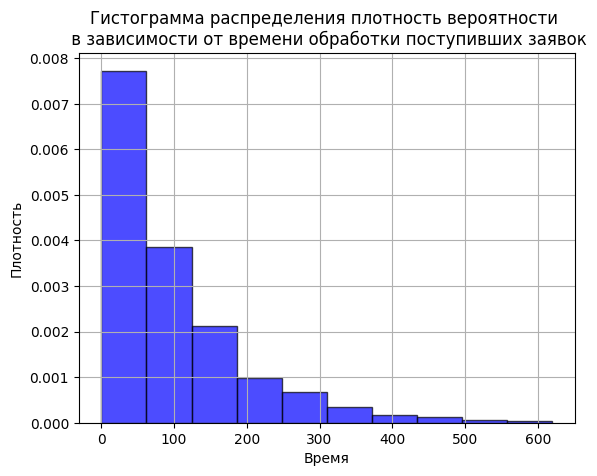

Опорные точки
Центры: [ 30.99883725  92.99534146 154.99184567 216.98834988 278.98485409
 340.9813583  402.97786251 464.97436672 526.97087093 588.96737514]
Плотность: [7.72624209e-03 3.85505607e-03 2.12915231e-03 9.83926445e-04
 6.77457552e-04 3.54858718e-04 1.77429359e-04 1.29039534e-04
 6.45197669e-05 3.22598834e-05]
b0_ex = -4.67027, b1_ex = -0.00955
Погрешность восстановления коэффициента интенсивности составила 445 %


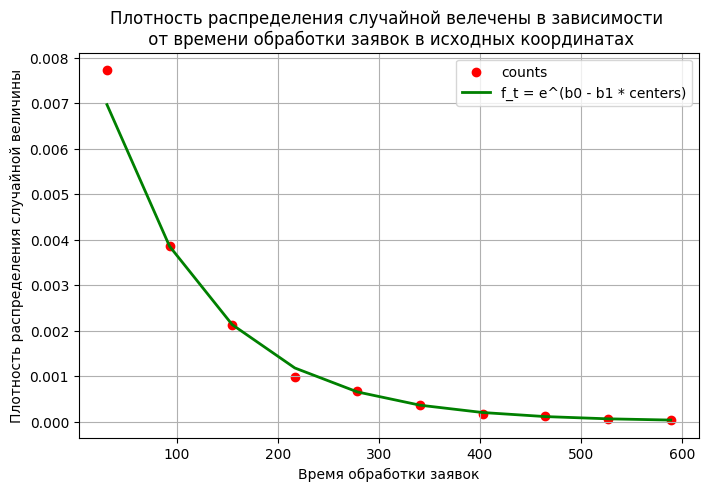

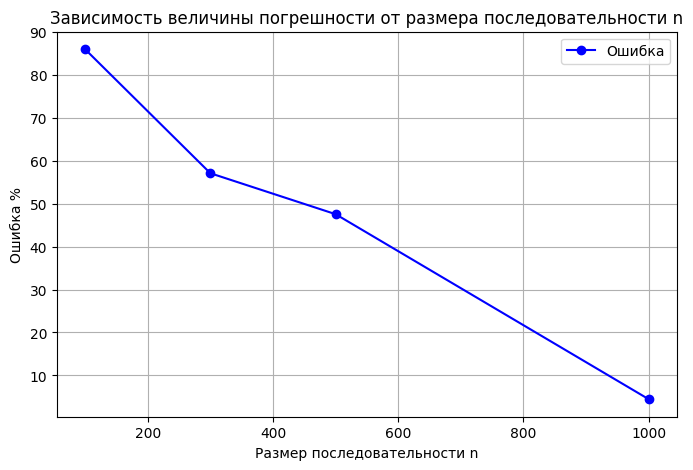

In [204]:
def experiment(lambd, n_values, bins=10):
    errors = []

    for n in n_values:
        print(f"\n Выборка n = {n}")
        data = Num(n, lambd)
        
        plot_histogram(data)
        
        # Extract histogram coordinates
        centers, counts = extract_hist_coord(data)
        print("Опорные точки")
        print(f"Центры: {centers}")
        print(f"Плотность: {counts}")
                
        ln_counts = np.log(counts + 1e-9) 
        
        b0_ex, b1_ex = calculate_b0_b1(centers, ln_counts)
        print(f"b0_ex = {b0_ex:.5f}, b1_ex = {b1_ex:.5f}")

        b1_true = - b1_ex 

        relative_err = (abs(b1_true - lambd) / lambd) * 100
        errors.append(relative_err)

        print(f"Погрешность восстановления коэффициента интенсивности составила {relative_err * 100:.0f} %")

        ln_f_t = b0_ex - b1_true * centers
        f_t = np.exp(ln_f_t)
        

        plot_flow_density_vs_time(centers, counts, f_t)


    plt.figure(figsize=(8, 5))
    plt.plot(n_values, errors, marker="o", linestyle="-", color="blue", label="Ошибка")
    plt.title("Зависимость величины погрешности от размера последовательности n")
    plt.xlabel("Размер последовательности n")
    plt.ylabel("Ошибка %")
    plt.grid()
    plt.legend()
    plt.show()

# Run experiments for different n values
n_values = [100, 300, 500, 1000]
lambd = 0.01
experiment(lambd, n_values)